**Exercise 14.1**

Consider the integral

$\int_{0}^{\pi}2x sin(x^2)dx$

which has the exact value $I = 1 - cos(\pi^2)$. Approximate this integral using the left endpoint rule $I_L$ and midpoint rule $I_M$, both with N = 10 subintervals. Which rule gives the more accurate answer? How many subintervals are required to reduce the error in $I_L$ by a factor of 100? How many subintervals are required to reduce the error in $I_M$ by a factor of 100?

ANSWER: 

- For N = 10 subintervals, the left endpoint rule gives a more accurate answer.
- It takes 4213 subintervals to reduce left endpoint error by a factor of 100.
- It takes 94 subintervals to reduce midpoint error by a factor of 100.

In [11]:
import numpy as np

def left_endpoint_rule( f, a, b, N ):
    delta_x = ( b - a ) / N
    x = np.linspace( a, b, N + 1 )
    total = 0
    for i in range( 1, N + 1 ):
        total += ( f( x[ i - 1 ] ) * delta_x )
    return total

def midpoint_rule( f, a, b, N ):
    delta_x = ( b - a ) / N
    x = np.linspace( a, b, N + 1 )
    total = 0
    for i in range( 1, N + 1 ):
        total += ( f( ( x[ i - 1 ] + x[ i ] ) / 2 ) * delta_x )
    return total

def f( x ):
    return 2 * x * np.sin( x ** 2 )

a = 0
b = np.pi
exact = 1 - np.cos( np.pi ** 2 )

N = 10
I_L = left_endpoint_rule( f, a, b, N )
I_M = midpoint_rule( f, a, b, N )
errorL = abs( exact - I_L )
errorM = abs( exact - I_M )

print( "Exact Value:", exact )
print( "Left Endpoint Rule:", I_L, ", Error:", errorL )
print( "Midpoint Rule:", I_M, ", Error:", errorM )

errorL_goal = errorL / 100
errorM_goal = errorM / 100

N_L = N
while errorL > errorL_goal:
    N_L += 1
    I_L = left_endpoint_rule( f, a, b, N_L )
    errorL = abs( exact - I_L )
print("It takes", N_L, "subintervals to reduce left endpoint error by a factor of 100.") 

N_M = N
while errorM > errorM_goal:
    N_M += 1
    I_M = midpoint_rule( f, a, b, N_M )
    errorM = abs( exact - I_M )
print("It takes", N_M, "subintervals to reduce midpoint error by a factor of 100.") 

Exact Value: 1.9026853619330715
Left Endpoint Rule: 2.0033230323825566 , Error: 0.10063767044948513
Midpoint Rule: 2.0738936976731672 , Error: 0.17120833574009575
It takes 4213 subintervals to reduce left endpoint error by a factor of 100.
It takes 94 subintervals to reduce midpoint error by a factor of 100.


**Exercise 14.3a**

Write a code that uses the trapezoid rule, Eq.(14.16), to approximate

$\int_{1}^{2}sin(x + ln x)dx$

Make a table showing the answer for various numbers of subintervals N. Determine the answer to at least 5 significant figures.

ANSWER: 0.84181

Note: I only printed the last 10 values in the range 1990 to 2000 because printing all 2000 would be too much. 

In [21]:
import numpy as np

def left_endpoint_rule( f, a, b, N ):
    delta_x = ( b - a ) / N
    x = np.linspace( a, b, N + 1 )
    total = 0
    for i in range( 1, N + 1 ):
        total += ( f( x[ i - 1 ] ) * delta_x )
    return total

def trapezoid_rule( f, a, b, N ):
    left_endpoint = left_endpoint_rule( f, a, b, N )
    delta_x = ( b - a ) / N
    f_b = f(b)
    f_a = f(a)
    return left_endpoint + ( 0.5 * ( f_b - f_a ) ) * delta_x

def f( x ):
    return np.sin( x + np.log( x ) )

a = 1 
b = 2

for N in range( 1990, 2000 ):
    approx = trapezoid_rule( f, a, b, N )
    print( f"{N}    {approx}" )

1990    0.8418103106651218
1991    0.8418103107165229
1992    0.8418103107678465
1993    0.8418103108190929
1994    0.841810310870263
1995    0.8418103109213587
1996    0.841810310972373
1997    0.8418103110233126
1998    0.8418103110741776
1999    0.8418103111249662


**Exercise 14.4a**

Use Simpson’s rule to approximate

$-\int_{\pi^2/4}^{4\pi^2}sin(\sqrt{x})dx$

The exact answer is $I = 2 + 4\pi$. Find the number of subintervals required for Simpson’s rule to compute the answer to 8 significant f igures. How many evaluations of the integrand does this require? Approximate the same integral using the trapezoid rule, and find the number of subintervals required to reach 8 significant figures. How many evaluations of the integrand are needed for the trapezoid rule?

ANSWER: 

- It takes 46 subintervals to get to 8 significant figures using Simpson's rule.  
- It takes 3846 subintervals to get to 8 significant figures using the trapezoid rule. 

In [64]:
import numpy as np

def left_endpoint_rule( f, a, b, N ):
    delta_x = ( b - a ) / N
    x = np.linspace( a, b, N + 1 )
    total = 0
    for i in range( 1, N + 1 ):
        total += ( f( x[ i - 1 ] ) * delta_x )
    return total

def trapezoid_rule( f, a, b, N ):
    left_endpoint = left_endpoint_rule( f, a, b, N )
    delta_x = ( b - a ) / N
    f_b = f(b)
    f_a = f(a)
    return left_endpoint + ( 0.5 * ( f_b - f_a ) ) * delta_x

def simpsons_rule( f, a, b, N ):
    delta_x = ( b - a ) / N
    # for loop 1
    summation1 = 0
    for i in range( 1, N ):
        x_i = a + i * delta_x
        summation1 += f( x_i )
    # for loop 2
    summation2 = 0
    for i in range( 1, N + 1 ):
        x_im1 = a + ( i - 1 ) * delta_x
        x_i = a + i * delta_x
        summation2 += f( ( x_im1 + x_i ) / 2 )
    # part of Simpson's in brackets
    brackets = f( a ) + f(  b) + 2 * summation1 + 4 * summation2
    # final result
    return ( delta_x / 6 ) * brackets

def f( x ):
    return np.sin( np.sqrt( x ) ) * -1

exact = 2 + 4 * np.pi
a = np.pi ** 2 * 0.25
b = 4 * np.pi ** 2

print( "Exact:", exact )

print("")
print("Simpson's Rule")
for N in range( 45, 55 ):
    approx = simpsons_rule( f, a, b, N )
    print( f"{N}    {approx}" )

print("")
print("Trapezoid Approximation: ")
for N in range( 3840, 3850 ):
    approx = trapezoid_rule( f, a, b, N )
    print( f"{N}    {approx}" )

Exact: 14.566370614359172

Simpson's Rule
45    14.566380271296925
46    14.566379466134212
47    14.566378743043712
48    14.566378092200946
49    14.56637750512492
50    14.566376974472444
51    14.566376493867121
52    14.566376057756765
53    14.566375661293902
54    14.566375300235556

Trapezoid Approximation: 
3840    14.566369998319058
3841    14.566369998639795
3842    14.566369998960292
3843    14.566369999280491
3844    14.566369999600475
3845    14.566369999920218
3846    14.566370000239678
3847    14.566370000558912
3848    14.566370000877903
3849    14.566370001196614


**Exercise 14.4b**

Approximate the integral

$\int_{0}^{\pi}sin(x)^\frac{3}{2}dx$

using Simpson’s rule. Find the answer to 6 significant figures.

ANSWER: 1.74804

In [70]:
import numpy as np

def simpsons_rule( f, a, b, N ):
    delta_x = ( b - a ) / N
    # for loop 1
    summation1 = 0
    for i in range( 1, N ):
        x_i = a + i * delta_x
        summation1 += f( x_i )
    # for loop 2
    summation2 = 0
    for i in range( 1, N + 1 ):
        x_im1 = a + ( i - 1 ) * delta_x
        x_i = a + i * delta_x
        summation2 += f( ( x_im1 + x_i ) / 2 )
    # part of Simpson's in brackets
    brackets = f( a ) + f(  b) + 2 * summation1 + 4 * summation2
    # final result
    return ( delta_x / 6 ) * brackets

def f( x ):
    return ( np.sin( x ) ) ** ( 3 / 2 )

a = 0
b = np.pi

for N in range( 35, 45 ):
    approx = simpsons_rule( f, a, b, N )
    print( f"{N}    {approx}" )

35    1.7480503932564586
36    1.748049574984298
37    1.748048832616359
38    1.7480481573327837
39    1.7480475415348888
40    1.7480469786502268
41    1.7480464629727042
42    1.7480459895307647
43    1.7480455539781918
44    1.7480451525032161


**Exercise 14.5a**

The Fresnel integrals defined by 

S(u) = $\int_{0}^{u}sin(\pi x^2 / 2)dx$

C(u) = $\int_{0}^{u}cos(\pi x^2 / 2)dx$

play an important role in optics. Write a code to create a plot of $S(u)$ and $C(u)$ versus $u$ for $0 \leq u \leq 5$. Use quad() to evaluate the integrals. 

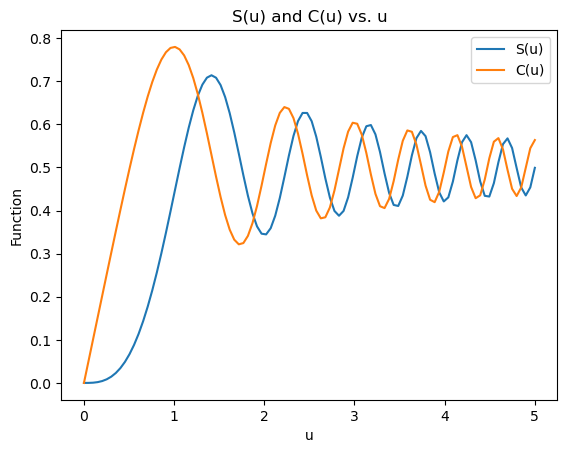

In [81]:
import scipy.integrate as si 
import numpy as np
import matplotlib.pyplot as plt

def f1( x ):
    return np.sin( np.pi * ( x ** 2 / 2 ) )

def f2( x ):
    return np.cos( np.pi * ( x ** 2 / 2 ) )

u = np.linspace( 0, 5, 100 ) # to integrate over

S_vals = [ si.quad( f1, 0, i )[ 0 ] for i in u ]
C_vals = [ si.quad( f2, 0, i )[ 0 ] for i in u ]

plt.close() 
fig, ( ax1 ) = plt.subplots( 1, 1 )
ax1.plot( u, S_vals, label = "S(u)" )
ax1.plot( u, C_vals, label = "C(u)" )
plt.title( "S(u) and C(u) vs. u" )
plt.xlabel( "u" )
plt.ylabel( "Function" )
ax1.legend()
plt.show()

**Exercise 14.5d**

The gamma function is defined by

$\Gamma(s) = \int_{0}^{\infty}x^{s - 1}e^{-x}dx$

Since the integrand approaches zero rapidly as x increases, you can approximate the integral by replacing the upper limit of integration with a large positive constant u and using quad(). The gamma function has the amazing property that for positive integer values of its argument, $\Gamma(s) = (s - 1)!$. Use this as a check to make sure your choice for u is large enough to give reasonably accurate answers.

Plot a graph of $\Gamma(s)$ for the domain $0.2 \leq s \leq 4$.

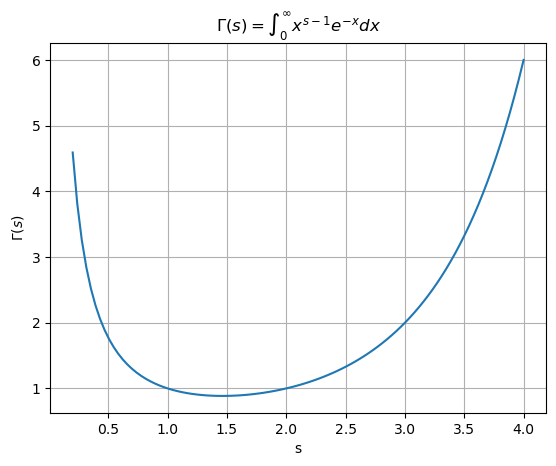

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from math import factorial

def f( x, s ):
    return x ** ( s - 1 ) * np.exp( -x )

s = np.linspace( 0.2, 4, 100 )
gamma_vals = []

for i in s:
    def f( x ):
        return x**( i - 1 ) * np.exp( -x )
        
    gamma_val, _ = quad( f, 0, np.inf )
    gamma_vals.append(gamma_val)

plt.plot( s, gamma_vals )
plt.xlabel( "s") 
plt.ylabel( r"$\Gamma(s)$" )
plt.title( r"$\Gamma(s) = \int_{0}^{\infty}x^{s - 1}e^{-x}dx$" )
plt.grid(True)
plt.show()